# DEEP LEARNING
## TAREA 10
## Diego Camilo Celada Lozada


### Primer punto

Encuentre el tamaño del campo receptivo (cuadrado) para una neurona que resultó en la cascada de n capas de agrupación convolucional con un tamaño de kernel convolucional de k, tamaño de kernel de agrupación de p. 

## Desarrollo
\begin{eqnarray}
  \text{input} && x\\ 
  \text{layer 1:} && x-k+1=&&x-k+1\\
  \text{layer 2:} && x-k+1-p+1= && x-(k+p)+2\\
  \text{layer 3:} && x-(k-p)+2-k+1-p+1= && x-2(k+p)+4\\
  &\vdots & \\ 
  \text{layer n:} && x-n(k+p)+2 n
\end{eqnarray}

Ya que el patrón de apertura se reduce a un punto:
$$x-n(k+p)+2 n=1$$
Tenemos:
$$x=n(k+p)-2n+1$$

### Ejemplo

Para una kernel size=3 y pooling size=2 y n=1

x=1(3+2)-2(1)+1=2

## Segundo punto

Reproducir la practica de laboratorio

### Parte practica: Laboratorio

### Importar librerias

In [3]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, AvgPool2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from keras.utils.vis_utils import plot_model


### Cargar datos y repartirlos

In [4]:
(train_x, train_y), (test_x, test_y) = mnist.load_data()


11501568/11490434 [==============================] - 0s 0us/step


### Verificar los datos



In [5]:
print("The size of train_x is {}".format(train_x. shape))
print("The size of train_y is {}".format(train_y. shape))
print("The size of test_x is {}".format(test_x. shape))
print("The size of test_y is {}".format(test_y. shape))

The size of train_x is (60000, 28, 28)
The size of train_y is (60000,)
The size of test_x is (10000, 28, 28)
The size of test_y is (10000,)


### Reshaping to 4 order tensors

In [6]:
train_x = train_x.reshape(train_x.shape[0], 28, 28, 1)
test_x = test_x.reshape(test_x.shape[0], 28, 28, 1)

### Normalizacion

In [7]:
train_x = train_x/255.0
test_x = test_x/255.0

### One-hot-coding the labels

In [8]:
train_y = to_categorical(train_y, num_classes=10)
test_y = to_categorical(test_y, num_classes=10)

### Construccion del modelo

In [9]:
# definir, instanciar
model = Sequential()

# adicionar la capa convolucional
# Input (28 x 28) , originalmente es 32 x 32
# numero de filtros 6
# el tamano del kernel es (5 x 5 )
# padding p=0
# strides s=1
# size of feature map (28-5+ 2*0)/1 + 1 = 24 x 24
# numero de parametros (5 x 5 x 1 + 1)x6 = 156
# la funcion de activacion ReLU (original es tanh)

model.add(Conv2D(filters=6,
                 kernel_size=5,
                 strides=1,
                 activation='relu',
                 input_shape=(28,28,1)))

# pooling layer S2
# input shape (24 x 24)
# filter size (2 x 2)
# padding p=0
# strides s=2
# output size (24-2)/2+1 = 12, (12 x 12)

model.add( AvgPool2D(pool_size=(2,2)))


# Add capa convolucional C3
# input shape (12 x 12 )
# numero de filtros = 16
# tamano del kernel (5 x 5 )
# strides s=1
# padding p=0
# output size (12-5+1=8), (8 x 8)
# numero de parametros (5 x 5 x 6 + 1)x16 = 2416
model.add(Conv2D(filters=16, 
                 kernel_size=(5,5),
                 activation='relu'))

# average pooling layer
# input (8 x 8)
# numero de filtros 16
# tamano del kernel (2 x 2 )
# padding p=0
# strides s =2
# tamano de salida (8-2)/2 + 1 =4,  4 x 4
model.add(AvgPool2D(pool_size=(2,2)))

# en el modelo original hay una conovolucion de mas, por que era 32x32 datos, aca son 28x28
# no alcanza. 
# vamos a "flatten" la capa, queda una capa densa con 256 nodos.
model.add(Flatten())



# agregar capa densa de 120 nodos
# numero de entrada 256
# parametros (120+1)*256 = 30840
model.add( Dense(120, activation='relu'))

# agregar capa densa de 84 nodos
# numero de entrada 120
# numero de salida 84
# parametros (120+1)x84 = 10164 
model.add(Dense(84, activation='relu'))

# capa de clasificacion
# softmax 
# numero de entrada 84
# numero de salida 10
# parametros (84+1)x10 = 850
model.add(Dense(10, activation='softmax'))


# muestre el sumario del modelo
model.summary()






Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 4, 4, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               30840     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

### Compliacion y corrida del modelo

In [10]:
model.compile( loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
model.fit (train_x, train_y, batch_size=128, epochs=20, verbose=1, validation_data=(test_x, test_y))

Epoch 1/20
469/469 [==============================] - 34s 8ms/step - loss: 0.4073 - accuracy: 0.8812 - val_loss: 0.1352 - val_accuracy: 0.9595
Epoch 2/20
469/469 [==============================] - 3s 7ms/step - loss: 0.1110 - accuracy: 0.9672 - val_loss: 0.0698 - val_accuracy: 0.9776
Epoch 3/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0803 - accuracy: 0.9762 - val_loss: 0.0606 - val_accuracy: 0.9807
Epoch 4/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0651 - accuracy: 0.9800 - val_loss: 0.0523 - val_accuracy: 0.9843
Epoch 5/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0542 - accuracy: 0.9832 - val_loss: 0.0580 - val_accuracy: 0.9823
Epoch 6/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0450 - accuracy: 0.9857 - val_loss: 0.0527 - val_accuracy: 0.9816
Epoch 7/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0410 - accuracy: 0.9868 - val_loss: 0.0375 - val_accuracy: 0.9878
Epoch

## Evaluacion Final

In [11]:
score = model.evaluate(test_x, test_y)
print("test loss", score[0])
print("test accuracy", score[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.0334 - accuracy: 0.9905
test loss 0.03341621160507202
test accuracy 0.9904999732971191


### Graficar los datos:


In [22]:
import matplotlib.pyplot as plt


def plot_example(X, y, y_pred=None):
  """
    9 graficas
    parametros:
    -X : las muestras de entrenamiento
    -y: true labels
    -y_pred: las predicciones

"""

  # creamos la figura de 3x3
  fig, axes = plt.subplots(3,3)
  fig.subplots_adjust(hspace=0.6, wspace=0.6)

  X, y = X[:9, ... , 0], y[:9]

  for i, ax in enumerate(axes.flat):
    # grafico la imagen
      ax.imshow(X[i])

    # las etiquetas
      if y_pred is  None:
          x_label="True: {0}".format(y[i])
      else:
          xlabel = "True: {0}, Pred: {1}".format(y[i], y_pred[i])

    # muestra las etiquetas
      ax.set_xlabel(xlabel)

    # removemos los tics
  ax.set_xticks([])
  ax.set_yticks([])

    # muestre la grafica
  plt.show()
    

### Evaluacion final

In [13]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt




In [14]:
# salvemos el modelo
model.save("lenet5_model.h5")


model = tf.keras.models.load_model('lenet5_model.h5')

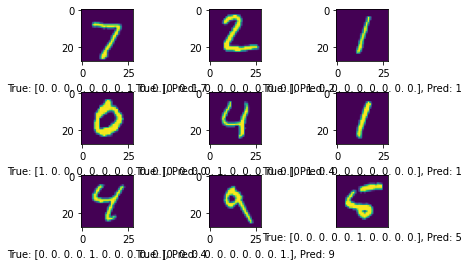

In [23]:

# hacer predicciones
predictions = model.predict(test_x)

# tomemos los uy
pred_y = np.argmax(predictions, axis=1)

# graficar
plot_example(test_x, test_y, pred_y)